<img src="image/entete.png" /> 

<h1 style="color: #B40431;" > <center> Thème : Analyse & Complexité des Algorithmes </center></h1>


In [1]:
from datetime import *
import matplotlib.pyplot as plt
import time
from random import randint
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(10005)



# <span style="color:#1E7C50">Tri par selection</span>

In [2]:
def tri_selection(t, n):

    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t
    for i in range(n-1):
        # On suppose que le min est en premier
        min = t[i]
        imin = i
        for j in range(i+1, n):
            if t[j] < min:
                # On met à jour le min
                min = t[j]
                imin = j
        if imin != i:
            # On pertmute pour mettre le min en premier
            t[imin] = t[i]
            t[i] = min
    return t

# <span style="color:#1E7C50">Tri à bulle:</span>

In [3]:
def tri_bulle(t, n):

    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t
    for i in range(n-1):
        for j in range(n-1-i):
            if t[j] > t[j+1]:
                # On permute
                temp = t[j]
                t[j] = t[j+1]
                t[j+1] = temp
    return t

# <span style="color:#1E7C50">Tri par Insertion</span>

In [4]:
def tri_insertion(t, n):

    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t
    for i in range(2, n):
        temp = t[i]
        j = i - 1
        while t[j] > t[i] and j >= 0:
            t[j+1] = t[j]
            j -= 1
        t[j] = temp
    return t


# <span style="color:#1E7C50">Tri par fusion</span>

In [5]:
def tri_fusion(t, n):

    def vidage(ta, pa, na, t, p):
  
        for i in range(pa, na):
            t[p] = ta[i]
            p += 1
        return t

    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t

    # Cas général : on découpe le tableau en 2 partie que l'on trie
    p = n // 2
    t1 = t[:p]
    n1 = len(t1)
    t1 = tri_fusion(t1, n1)
    t2 = t[p:]
    n2 = len(t2)
    t2 = tri_fusion(t2, n2)
    # Fusion des deux parties
    p1, p2, p = 0, 0, 0 # position dans t1, t2 et t
    while p1 < n1 and p2 < n2:
        if t1[p1] < t2[p2]:
            # On met t1[p1] dans t
            t[p] = t1[p1]
            p1 += 1
        else:
            # On met t2[p2] dans t
            t[p] = t2[p2]
            p2 += 1
        p += 1
    if p1 == len(t1):
        vidage(t2, p2, len(t2), t, p)
    else:
        vidage(t1, p1, len(t1), t, p)
    return t

# <span style="color:#1E7C50"> Tri rapide:</span>

In [6]:
def tri_rapide(t, n):

    def tri_rapide(t, i, j):
        if i >= j:
            # Pas besoin de trier
            return t
        p = i
        # On place les éléments plus petits que le pivot (t[j-1]) au début
        for k in range(i, j-1):
            if t[k] <= t[j-1]:
                t[k], t[p] = t[p], t[k]
                p += 1
        # On remet le pivot après les éléments plus petits
        t[j-1], t[p] = t[p], t[j-1]
        # On trie les deux parties
        tri_rapide(t, i, p-1)
        tri_rapide(t, p+1, j-1)
        return t

    if n < 2:
        # Moins de 2 éléments : pas besoin de trier
        return t

    t = tri_rapide(t, 0, n)
    return t

### <span style="color:#E6951A">Classe pour mesurer le temps d’exécution d’un algorithme</span>


In [5]:
class Compteur(object):
    def __init__(self, nom):
        self.nom = nom

    def __enter__(self):
        self.t_debut = time.time()

    def __exit__(self, exc_ty, exc_val, exc_tb):
        t_fin = time.time()
        print('{}: {}'.format(self.nom, t_fin - self.t_debut))

### <span style="color:#E6951A">Générer aléatoirement un tableau de n entiers( on varie n de 10 000 à 90 000)</span>

In [76]:
t = [randint(0, 1000) for i in range(90000)]


### <span style="color:#E6951A"> Mesurer le temps d'éxécution de chaque </span>


In [9]:
with Compteur("Tri par sélection"):
    t2 = tri_selection(t, len(t))

Tri par sélection: 470.33608531951904


In [60]:
 with Compteur("Tri par insertion"):
        t4 = tri_insertion(t, len(t))

Tri par insertion: 0.17420697212219238


In [68]:
with Compteur("Tri fusion"):
        t5 = tri_fusion(t, len(t))



Tri fusion: 0.8837273120880127


In [73]:
with Compteur("Tri bulle"):
        t6 = tri_bulle(t, len(t))


Tri bulle: 1163.5523557662964


In [77]:
with Compteur("Tri rapide"):
        t7 = tri_rapide(t, len(t))

Tri rapide: 1.4317567348480225


# <span style="color:#1E7C50"> Tri par sélection</span>

## 1. Le tableau des mesures du temps 

valeur de N    |                  Temps d’exécution 
:----- | :----: 
10000   |  5.608956813812256 
15000  |  12.324905157089233 
20000   |  22.52531599998474
25000  |  33.44592022895813 
30000|49.218151330947876 
35000|66.714914560318
40000|85.84835028648376
45000|101.28695344924927
50000| 138.81094121932983
55000|179.0379340648651
60000|212.405686378479
65000|239.06380200386047
70000|318.6122717857361 
75000| 317.1682815551758
80000|362.1530089378357 
85000|425.29745626449585
90000|470.33608531951904 

## 2. Affichage de la courbe : Tri par sélection 

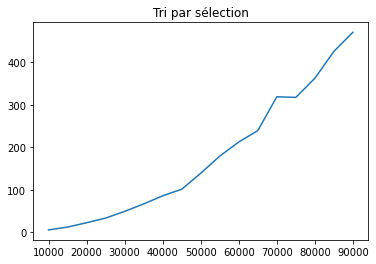

In [10]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([10000, 15000, 20000, 25000, 30000, 35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000])
y = np.array([5.608956813812256 , 12.324905157089233, 22.52531599998474, 33.44592022895813, 49.218151330947876, 66.714914560318, 85.84835028648376, 101.28695344924927, 138.81094121932983, 179.0379340648651, 212.405686378479, 239.06380200386047, 318.6122717857361, 317.1682815551758, 362.1530089378357, 425.29745626449585, 470.33608531951904])
plt.plot(x, y)
plt.title("Tri par sélection")
plt.show() 




# <span style="color:#1E7C50">Tri par Insertion :


## 1. Le tableau des mesures du temps 

valeur de N    |                  Temps d’exécution 
:----- | :----: 
10000   |  0.0049953460693359375 
15000  |  0.006994724273681641 
20000   |  0.005997896194458008
25000  |  0.0354609489440918 
30000|0.02977275848388672 
35000|0.03397679328918457
40000|0.0582273006439209
45000|0.05321478843688965
50000| 0.06235647201538086
55000|0.08147287368774414
60000|0.1072843074798584
65000|0.12798452377319336
70000|0.13283586502075195
75000| 0.1320507526397705
80000|0.15703058242797852 
85000|0.18067049980163574
90000|0.17420697212219238 

## 2. Affichage de la courbe : Tri par insertion 

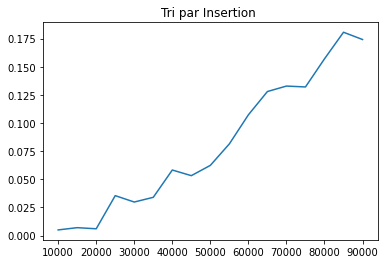

In [62]:
x = np.array([10000, 15000, 20000, 25000, 30000, 35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000])
y = np.array([0.0049953460693359375 , 0.006994724273681641, 0.005997896194458008, 0.0354609489440918, 0.02977275848388672, 0.03397679328918457, 0.0582273006439209, 0.05321478843688965, 0.06235647201538086, 0.08147287368774414, 0.1072843074798584, 0.12798452377319336, 0.13283586502075195, 0.1320507526397705, 0.15703058242797852, 0.18067049980163574, 0.17420697212219238])
plt.plot(x, y)
plt.title("Tri par Insertion ")
plt.show() 


# <span style="color:#1E7C50"> Tri Fusion:


## 1. Le tableau des mesures du temps 

valeur de N    |                  Temps d’exécution 
:----- | :----: 
10000   |  0.08995223045349121 
15000  |  0.12596869468688965 
20000   |  0.15892958641052246
25000  |  0.19191527366638184 
30000|0.2214069366455078 
35000|0.3048238754272461
40000|0.2968440055847168
45000|0.37105560302734375
50000| 0.0.41276121139526367
55000|0.4217808246612549
60000|0.4874844551086426
65000|0.5229408740997314
70000|0.5734314918518066
75000| 0.7041032314300537
80000|0.7629947662353516 
85000|0.7753057479858398
90000|0.8837273120880127 

## 2. Affichage de la courbe : Tri Fusion 

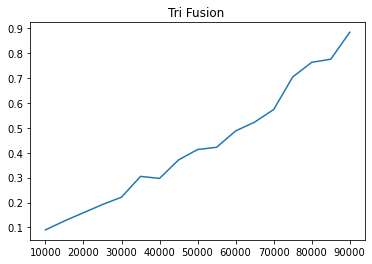

In [69]:
x = np.array([10000, 15000, 20000, 25000, 30000, 35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000])
y = np.array([0.08995223045349121 , 0.12596869468688965, 0.15892958641052246, 0.19191527366638184, 0.2214069366455078, 0.3048238754272461, 0.2968440055847168, 0.37105560302734375, 0.41276121139526367, 0.4217808246612549, 0.4874844551086426, 0.5229408740997314, 0.5734314918518066, 0.7041032314300537, 0.7629947662353516, 0.7753057479858398, 0.8837273120880127])
plt.plot(x, y)
plt.title("Tri Fusion ")
plt.show() 


#  <span style="color:#1E7C50">Tri à bulle:


## 1. Le tableau des mesures du temps 

valeur de N    |                  Temps d’exécution 
:----- | :----: 
10000   |  8.550340175628662 
15000  |  21.685203313827515 
20000   |  38.34774112701416
25000  |  108.61269068717957 
30000|150.45601415634155
35000|212.35982656478882
40000|306.4874858856201
45000|406.2893877029419
50000|445.39484214782715
55000|550.3253104686737
60000|665.628853559494
65000|775.2833921909332
70000|1037.1711893081665
75000|1186.4637506008148
80000|1163.5523557662964 
85000|1392.697470664978
90000|1513.4455780982971 

## 2. Affichage de la courbe : Tri à bulle 

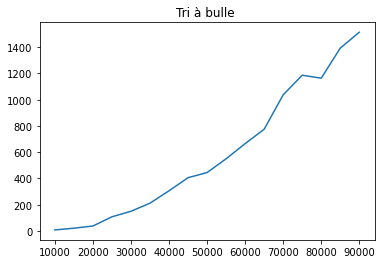

In [75]:
x = np.array([10000, 15000, 20000, 25000, 30000, 35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000])
y = np.array([8.550340175628662 , 21.685203313827515, 38.34774112701416, 108.61269068717957, 150.45601415634155, 212.35982656478882, 306.4874858856201, 406.2893877029419, 445.39484214782715, 550.3253104686737, 665.628853559494, 775.2833921909332, 1037.1711893081665, 1186.4637506008148, 1163.5523557662964, 1392.697470664978, 1513.4455780982971])
plt.plot(x, y)
plt.title("Tri à bulle ")
plt.show() 


# <span style="color:#1E7C50"> Tri Rapide:


## 1. Le tableau des mesures du temps 


valeur de N    |                  Temps d’exécution 
:----- | :----: 
10000   |  0.09094834327697754 
15000  |  0.1210331916809082 
20000   |  0.16990041732788086
25000  |  0.19688630104064941 
30000|0.2691078186035156
35000|0.34182095527648926
40000|0.36630868911743164
45000|0.49873876571655273
50000|0.6466302871704102
55000|0.6410684585571289
60000|0.7780411243438721
65000|0.7849571704864502
70000|0.9704675674438477
75000|1.0136353969573975
80000|1.2577598094940186 
85000|1.4245219230651855
90000|1.4317567348480225

## 2. Affichage de la courbe : Tri rapide


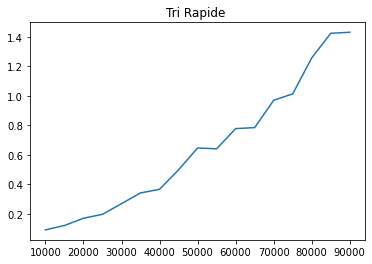

In [78]:
x = np.array([10000, 15000, 20000, 25000, 30000, 35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000])
y = np.array([0.09094834327697754 , 0.1210331916809082, 0.16990041732788086, 0.19688630104064941, 0.2691078186035156, 0.34182095527648926, 0.36630868911743164, 0.49873876571655273, 0.6466302871704102, 0.6410684585571289, 0.7780411243438721, 0.7849571704864502, 0.9704675674438477, 1.0136353969573975, 1.2577598094940186, 1.4245219230651855, 1.4317567348480225])
plt.plot(x, y)
plt.title("Tri Rapide ")
plt.show() 
